In [ ]:
!pip install PyYAML --upgrade
!pip install gdown
!apt-get install tree

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.6/dist-packages (5.3.1)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Requisitos que hay que instalar
import Cython,matplotlib,numpy,cv2,yaml,PIL,scipy,tensorboard,torch,torchvision,tqdm
from pycocotools import coco
print("matplotlib", matplotlib.__version__) # matplotlib>=3.2.2
print("numpy", numpy.__version__) # numpy>=1.18.5
print("opencv-python", cv2.__version__) # opencv-python>=4.1.2
print("pillow", PIL.__version__) # pillow
print("pycocotools", coco.__version__) # pycocotools>=2.0
print("PyYAML", yaml.__version__) # PyYAML>=5.3
print("scipy", scipy.__version__) # scipy>=1.4.1
print("tensorboard", tensorboard.__version__) # tensorboard>=2.2
print("torch", torch.__version__) # torch>=1.6.0
print("torchvision", torchvision.__version__) # torchvision>=0.7.0
print("tqdm", tqdm.__version__) # tqdm>=4.41.0

matplotlib 3.2.2
numpy 1.18.5
opencv-python 4.1.2
pillow 7.0.0
pycocotools 2.0
PyYAML 5.3.1
scipy 1.4.1
tensorboard 2.3.0
torch 1.6.0+cu101
torchvision 0.7.0+cu101
tqdm 4.41.1


In [ ]:
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: /content/clothing.json
100% 199k/199k [00:00<00:00, 74.1MB/s]


In [ ]:
# Importando librerias
%load_ext autoreload
%autoreload 2
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [ ]:
len(clothing)

504

In [ ]:
clothing[0]

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [ ]:
for c in clothing:
    if len(c["annotation"]) > 1:
        display(c)

In [ ]:
categories = []

for c in clothing:
    for a in c["annotation"]:
        categories.extend(a["label"])

categories = list(set(categories))
categories.sort()
categories


['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [ ]:
len(categories)

9

In [ ]:
train_clothing, val_clothing = traing, val_clothing = train_test_split(clothing, test_size=0.1)

In [ ]:
len(train_clothing), len(val_clothing)

(453, 51)

In [ ]:
row = train_clothing[10]
row

{'annotation': [{'imageHeight': 312,
   'imageWidth': 145,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.013793103448275862, 'y': 0.22756410256410256},
    {'x': 1, 'y': 0.7948717948717948}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/ec339ad6-6b73-406a-8971-f7ea35d47577___Data_s-top-203-red-srw-original-imaf2nfrxdzvhh3k.jpeg',
 'extras': None}

In [ ]:
img = urllib.request.urlopen(row["content"])
img = Image.open(img)
img = img.convert("RGB")
img.save("demo_image.jpg", "JPEG")

In [ ]:
img = cv2.cvtColor(cv2.imread("demo_image.jpg"), cv2.COLOR_BGR2RGB)

In [ ]:
img.shape

(312, 145, 3)

In [ ]:
for a in row["annotation"]:
    for label in a["label"]:
        
        w = a["imageWidth"]
        h = a["imageHeight"]
        
        points = a["points"]
        p1, p2 = points
        
        x1, y1 = p1["x"] * w, p1["y"] * h
        x2, y2 = p2["x"] * w, p2["y"] * h
        
        cv2.rectangle(
            img,
            (int(x1), int(y1)),
            (int(x2), int(y2)),
            color = (0,255,0),
            thickness = 2
        )
       
        ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75,
            thickness = 2
        )
        
        cv2.rectangle(
            img,
            (int(x1), int(y1)),
            (int(x1 + label_width + label_width * 0.05), 
             int(y1 + label_height + label_height * 0.05)),
            color = (0,255,0),  
            thickness = cv2.FILLED
        )
        
        cv2.putText(
            img,
            label,
            org = (int(x1), int(y1 + label_height + label_height * 0.05)), # En la parte de abajo izquierda  del texto
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 1.75, 
            color = (255,255,255),
            thickness = 2
        )

(-0.5, 144.5, 311.5, -0.5)

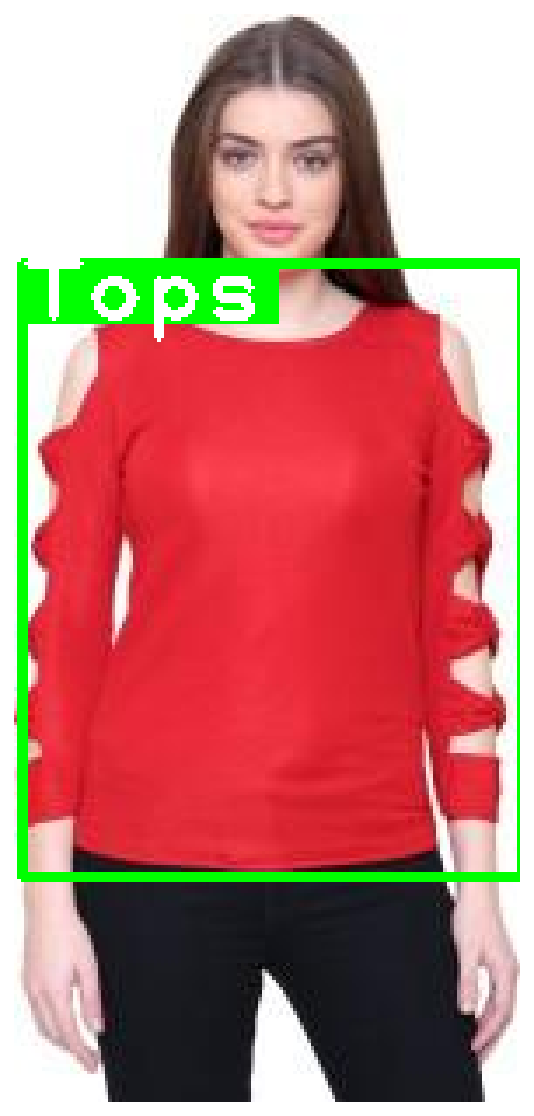

In [ ]:
plt.imshow(img)
plt.axis("off")

In [ ]:
def create_dataset(clothing, dataset_type):
    
    images_path = Path(f"clothing/images/{dataset_type}")
    images_path.mkdir(parents = True, exist_ok = True)
    
    labels_path = Path(f"clothing/labels/{dataset_type}")
    labels_path.mkdir(parents = True, exist_ok = True)
    
    for img_id, row in enumerate(tqdm(clothing)):
        
        image_name = f"{img_id}.jpg"
        
        img = urllib.request.urlopen(row["content"])
        img = Image.open(img)
        img = img.convert("RGB")
        
        img.save(str(images_path / image_name), "JPEG")
        
        label_name = f"{img_id}.txt"
        
        with (labels_path / label_name).open(mode = "w") as label_file:
            
            for a in row["annotation"]:
                
                for label in a["label"]:
                    
                    category_idx = categories.index(label)
                    
                    points = a["points"]
                    p1, p2 = points
                    
                    x1, y1 = p1["x"], p1["y"]
                    x2, y2 = p2["x"], p2["y"]
                    
                    bbox_width = x2 - x1
                    bbox_height = y2 - y1
                    
                    label_file.write(
                        f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}"
                    )
                    

In [ ]:
create_dataset(train_clothing, "train")
create_dataset(val_clothing, "val")

100%|██████████| 51/51 [00:10<00:00,  4.94it/s]


In [ ]:
!tree clothing -L 2

clothing
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files


In [ ]:
!cat clothing/labels/train/0.txt

4 0.525462962962963 0.5432692307692308 0.9027777777777778 0.9006410256410257

In [ ]:
#%cd yolov5

/content/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 2127 (delta 7), reused 14 (delta 5), pack-reused 2104
Receiving objects: 100% (2127/2127), 5.26 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (1381/1381), done.
/content/yolov5/yolov5


In [ ]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 260kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /content/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 2.43MB/s]


In [ ]:
!python train.py --img-size 640 640 --batch 4 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache-images

Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=30, evolve=False, global_rank=-1, hyp='data/hyp.finetune.yaml', img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5x.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-08-11 15:19:42.455435: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_

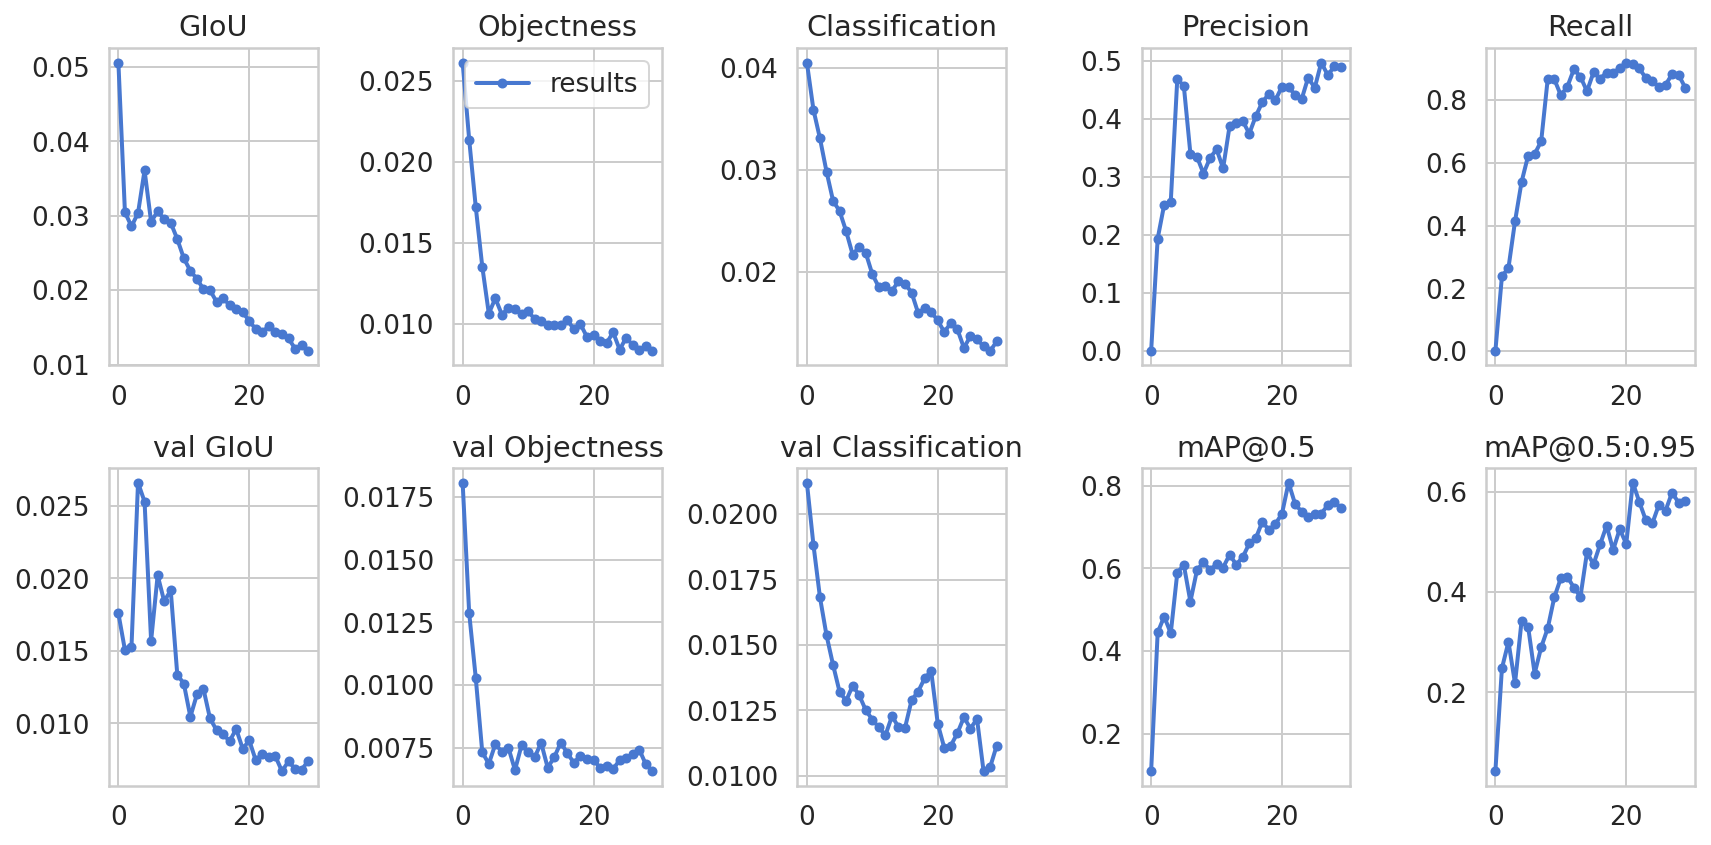

In [ ]:
from utils.general import plot_results

plot_results(save_dir="/content/yolov5/runs/exp0_yolov5x_clothing")

In [ ]:
!find ../clothing/images/val/ -maxdepth 1 -type f | head -50 | xargs cp -t "./inference/images/"

In [ ]:
!python detect.py --weights runs/exp0_yolov5x_clothing/weights/best_yolov5x_clothing.pt \
  --img-size 640 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', update=False, view_img=False, weights=['runs/exp0_yolov5x_clothing/weights/best_yolov5x_clothing.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... Model Summary: 284 layers, 8.84444e+07 parameters, 8.45317e+07 gradients
image 1/55 /content/yolov5/inference/images/0.jpg: 320x640 1 sunglassess, Done. (0.038s)
image 2/55 /content/yolov5/inference/images/1.jpg: 640x320 1 Skirtss, 1 Topss, Done. (0.040s)
image 3/55 /content/yolov5/inference/images/10.jpg: 640x448 1 Shirtss, Done. (0.040s)
image 4/55 /content/yolov5/inference/images/11.jpg: 640x384 1 Shirtss, Done. (0.024s)
image 5/55 /content/yolov5/inference/images/12.jpg: 640x256 1 Skirtss, Done. (0.021s)
image 6/55 /content/yolov5/inference/images/13.jpg: 640x384 Done. (0.023s)
image 7/55 /content/yo

In [ ]:
def load_image(img_path: "", resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=10)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

In [ ]:
img_paths = list(Path("inference/output").glob("*.jpg"))[:20]
show_grid(img_paths)

Output hidden; open in https://colab.research.google.com to view.